# Model selection, data set 3C

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Importing the dataset

In [2]:
dataset = pd.read_csv('germany_housing_data_part3C_imputing_missing_values.csv')
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
dataset.head()

,Living_space,Lot,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Year_renovated,Garages,Condition,Heating,Energy_source,State,Garagetype,Type,Price
0,106.00,229.0,5.5,3.000000,1.0,2.000000,2005.0,2005.0,2.0,modernized,central heating,gas,Baden-Württemberg,Parking lot,Multiple dwelling,498000.0
1,140.93,517.0,6.0,3.000000,2.0,2.282899,1994.0,1994.0,7.0,modernized,stove heating,gas,Baden-Württemberg,Parking lot,Mid-terrace house,495000.0
2,162.89,82.0,5.0,3.000000,2.0,4.000000,2013.0,2013.0,1.0,dilapidated,stove heating,other combinations of energy sources,Baden-Württemberg,Garage,Farmhouse,749000.0
3,140.00,814.0,4.0,2.591548,2.0,2.000000,1900.0,2000.0,1.0,fixer-upper,central heating,electricity,Baden-Württemberg,Garage,Farmhouse,259000.0
4,115.00,244.0,4.5,2.000000,1.0,2.282899,1968.0,2019.0,1.0,refurbished,central heating,oil,Baden-Württemberg,Garage,Multiple dwelling,469000.0


## Encoding categorical data

We can see below, that the column numbers 9 - 14 have categorical data and must be one hot encoded

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10527 entries, 0 to 10526
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Living_space    10527 non-null  float64
 1   Lot             10527 non-null  float64
 2   Rooms           10527 non-null  float64
 3   Bedrooms        10527 non-null  float64
 4   Bathrooms       10527 non-null  float64
 5   Floors          10527 non-null  float64
 6   Year_built      10527 non-null  float64
 7   Year_renovated  10527 non-null  float64
 8   Garages         10527 non-null  float64
 9   Condition       10527 non-null  object 
 10  Heating         10527 non-null  object 
 11  Energy_source   10527 non-null  object 
 12  State           10527 non-null  object 
 13  Garagetype      10527 non-null  object 
 14  Type            10527 non-null  object 
 15  Price           10527 non-null  float64
dtypes: float64(10), object(6)
memory usage: 1.3+ MB


### The onehot encoding of the columns

In [4]:
X = pd.get_dummies(X)
X.head(10)

,Living_space,Lot,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Year_renovated,Garages,Condition_as new,...,Type_Castle,Type_Corner house,Type_Duplex,Type_Farmhouse,Type_Mid-terrace house,Type_Multiple dwelling,Type_Residential property,Type_Single dwelling,Type_Special property,Type_Villa
0,106.00,229.0,5.5,3.000000,1.000000,2.000000,2005.0,2005.0,2.0,0,...,0,0,0,0,0,1,0,0,0,0
1,140.93,517.0,6.0,3.000000,2.000000,2.282899,1994.0,1994.0,7.0,0,...,0,0,0,0,1,0,0,0,0,0
2,162.89,82.0,5.0,3.000000,2.000000,4.000000,2013.0,2013.0,1.0,0,...,0,0,0,1,0,0,0,0,0,0
3,140.00,814.0,4.0,2.591548,2.000000,2.000000,1900.0,2000.0,1.0,0,...,0,0,0,1,0,0,0,0,0,0
4,115.00,244.0,4.5,2.000000,1.000000,2.282899,1968.0,2019.0,1.0,0,...,0,0,0,0,0,1,0,0,0,0
5,310.00,860.0,8.0,4.162387,2.307014,3.000000,1969.0,1969.0,2.0,0,...,0,0,0,0,1,0,0,0,0,0
6,502.00,5300.0,13.0,4.162387,4.000000,2.282899,2004.0,2004.0,7.0,0,...,0,0,1,0,0,0,0,0,0,0
7,263.00,406.0,10.0,4.162387,2.307014,3.000000,1989.0,1989.0,2.0,0,...,0,0,1,0,0,0,0,0,0,0
8,227.00,973.0,10.0,4.000000,4.000000,2.000000,1809.0,2015.0,8.0,0,...,0,0,1,0,0,0,0,0,0,0
9,787.00,933.0,30.0,4.162387,2.307014,3.000000,1920.0,1920.0,12.0,0,...,0,0,1,0,0,0,0,0,0,0


In [5]:
X = X.values
y = y.values

### The result of each model will be added to this list

In [6]:
results_r2 = []

# Model: XGBoost regression

## Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

## Training the XGBoost regression model 

In [8]:
from xgboost import XGBRegressor
#seed = 0 is default
regressor = XGBRegressor(seed = 0)
regressor.fit(X_train, y_train)

[12:19:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(seed=0)

## Predicting the Test set results

In [9]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[665777.62 450000.  ]
 [589404.06 750000.  ]
 [745827.62 149000.  ]
 ...
 [449855.03 529000.  ]
 [ 93764.98  89000.  ]
 [273895.03 195000.  ]]


## Evaluating the Model Performance

In [10]:
from sklearn.metrics import r2_score
results_r2.append(r2_score(y_test,y_pred))
print(r2_score(y_test,y_pred))


0.5275602310638814


# Model: Random forest regression

## Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

## Training the random forest regression model 

In [12]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

## Predicting the Test set results

In [13]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[664153.4  450000.  ]
 [608583.1  750000.  ]
 [577477.99 149000.  ]
 ...
 [437378.5  529000.  ]
 [ 99727.9   89000.  ]
 [313861.9  195000.  ]]


## Evaluating the Model Performance

In [14]:
from sklearn.metrics import r2_score
results_r2.append(r2_score(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.5419787243138738


# Model: Decision tree regression

## Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

## Training the Decision Tree Regression model 

In [16]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state= 0)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

## Predicting the Test set results

In [17]:
y_pred = tree.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 315000.  450000.]
 [1950000.  750000.]
 [ 215000.  149000.]
 ...
 [ 469000.  529000.]
 [ 195000.   89000.]
 [ 249000.  195000.]]


## Evaluating the Model Performance

In [18]:
from sklearn.metrics import r2_score
results_r2.append(r2_score(y_test,y_pred))
print(r2_score(y_test,y_pred))

-0.06781560181285506


# Model: Multiple linear regression

## Splitting the dataset into the Training set and Test set

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

## Training the Multiple linear regression 

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [21]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[519809.51 450000.  ]
 [549810.72 750000.  ]
 [789571.52 149000.  ]
 ...
 [683736.5  529000.  ]
 [ 23862.22  89000.  ]
 [171192.27 195000.  ]]


## Evaluating the Model Performance

In [22]:
from sklearn.metrics import r2_score
results_r2.append(r2_score(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.44288787472296176


# Model: Polynomial regression

## Splitting the dataset into the Training set and Test set

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 0)

## Training the Polynomial Regression model

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree= 2)
X_poly_train = poly_reg.fit_transform(X_train)

linear_poly = LinearRegression()
linear_poly.fit(X_poly_train,y_train)

LinearRegression()

## Predicting the Test set results

In [25]:
#X_poly_test = poly_reg.fit_transform(X_test)
X_poly_test = poly_reg.transform(X_test)
y_pred = linear_poly.predict(X_poly_test)

np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 840835.29  450000.  ]
 [ 560553.76  750000.  ]
 [-604064.86  149000.  ]
 ...
 [ 171259.28  529000.  ]
 [ 209267.4    89000.  ]
 [ 266298.86  195000.  ]]


## Evaluating the Model Performance

In [26]:
from sklearn.metrics import r2_score
results_r2.append(r2_score(y_test,y_pred))
print(r2_score(y_test,y_pred))


-0.980746046047646


# Model: Support vector regression

In [27]:
y = y.reshape(-1,1)

## Splitting the dataset into the Training set and Test set

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

## Feature scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

## Training the SVR regression model 

In [30]:
from sklearn.svm import SVR
regressor = SVR(kernel = "rbf")
regressor.fit(X_train, y_train)

SVR()

## Predicting the Test set results

In [31]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[425554.84 450000.  ]
 [343116.85 750000.  ]
 [429981.51 149000.  ]
 ...
 [556138.26 529000.  ]
 [ 78396.95  89000.  ]
 [265012.4  195000.  ]]


## Evaluating the Model Performance

In [32]:
from sklearn.metrics import r2_score
results_r2.append(r2_score(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.37483551179332


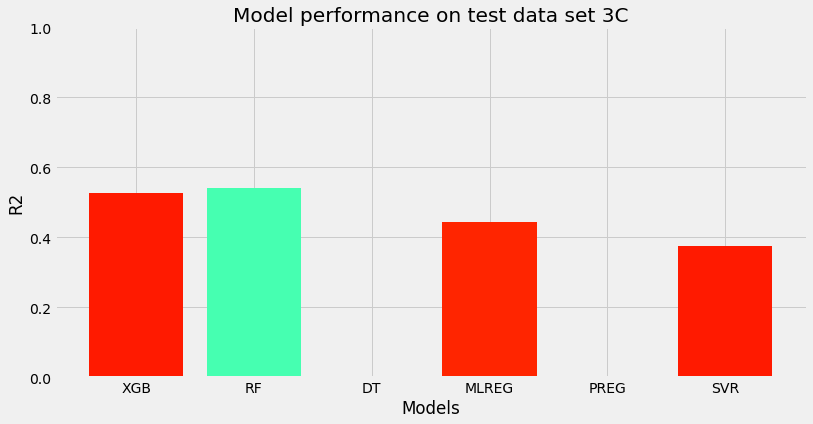

In [33]:
import matplotlib.cm as cm
from numpy.random import rand

# get a color map
cmap = cm.get_cmap('jet')
# 5 nbrs 0 - 1 in array
my_colors = rand(5)

plt.style.use('fivethirtyeight')
plt.figure(figsize =(12,6))

models = np.array(["XGB", "RF", "DT", "MLREG", "PREG","SVR"])

plt.bar(models, results_r2, color = cmap(my_colors))
plt.xlabel("Models")
plt.ylabel("R2")
plt.title("Model performance on test data set 3C")
plt.ylim(0.0, 1)
plt.show()